In [1]:
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt
import numpy as np

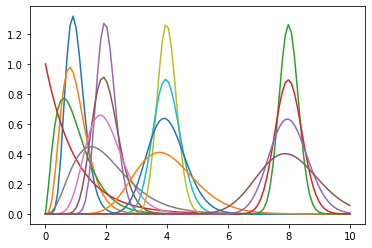

In [2]:
def pdf(x, mu, sigma):
    # Mean = k theta
    # Variance = k theta^2
    theta = sigma / mu
    k = mu / theta
    return gamma.pdf(x, k, scale=theta)

fig, ax = plt.subplots(1, 1)
x = np.linspace(0.001, 10, 100)
for mu in [1, 2, 4, 8]:
    for sigma in [0.1, 0.2, 0.4, 1.0]:
        ax.plot(x, pdf(x, mu, sigma))

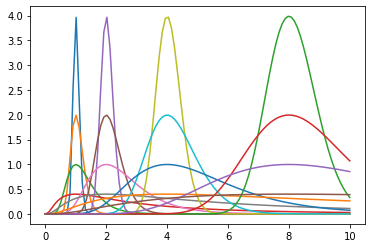

In [3]:
def pdf(x, mu, sigma):
    return norm.pdf(np.log(x), loc=np.log(mu), scale=sigma)

fig, ax = plt.subplots(1, 1)
x = np.linspace(0.001, 10, 100)
for mu in [1, 2, 4, 8]:
    for sigma in [0.1, 0.2, 0.4, 1.0]:
        ax.plot(x, pdf(x, mu, sigma))

In [27]:
from ebisu import *

ts = [1.25**i for i in range(30)]
hs = []
m = None
for i, t in enumerate(ts):
    if not m:
        m = defaultModel(10 / (60*24), 3)
    else:
        m = updateRecall(m, 1, 1, t - ts[i - 1])
    hs.append(modelToPercentileDecay(m))
    
fig, ax = plt.subplots(1, 1)
#ax.plot(ts, hs)
ax.plot([1,2,3],[3,2,1])

In [2]:
import numpy as np
from scipy.stats import gamma as gammarv
from scipy.special import gamma
from scipy.special import kv
import matplotlib.pylab as plt

a = 2.
b = 1.5
t = (a / b)  # mean halflife!

halflifes = gammarv.rvs(a, scale=1 / b, size=1_000_000)
prob = np.exp(-t / halflifes)

predictRecall = lambda a, b, t: 2 * (t * b)**(a / 2) * kv(a, 2 * np.sqrt(t * b)) / gamma(a)
predicted = predictRecall(a, b, t)

print('predictRecall @ time={}: analytical={}, Monte Carlo={}'.format(t, predicted, np.mean(prob)))

predictRecall @ time=1.3333333333333333: analytical=0.3092345700088991, Monte Carlo=0.308966816422458


<ipython-input-2-40694e33542d>:14: RuntimeWarning: invalid value encountered in double_scalars
  predictRecall = lambda a, b, t: 2 * (t * b)**(a / 2) * kv(a, 2 * np.sqrt(t * b)) / gamma(a)
<ipython-input-2-40694e33542d>:14: RuntimeWarning: invalid value encountered in double_scalars
  predictRecall = lambda a, b, t: 2 * (t * b)**(a / 2) * kv(a, 2 * np.sqrt(t * b)) / gamma(a)
<ipython-input-2-40694e33542d>:14: RuntimeWarning: invalid value encountered in double_scalars
  predictRecall = lambda a, b, t: 2 * (t * b)**(a / 2) * kv(a, 2 * np.sqrt(t * b)) / gamma(a)
<ipython-input-2-40694e33542d>:14: RuntimeWarning: invalid value encountered in double_scalars
  predictRecall = lambda a, b, t: 2 * (t * b)**(a / 2) * kv(a, 2 * np.sqrt(t * b)) / gamma(a)
<ipython-input-2-40694e33542d>:14: RuntimeWarning: invalid value encountered in double_scalars
  predictRecall = lambda a, b, t: 2 * (t * b)**(a / 2) * kv(a, 2 * np.sqrt(t * b)) / gamma(a)
<ipython-input-2-40694e33542d>:14: RuntimeWarning: inva

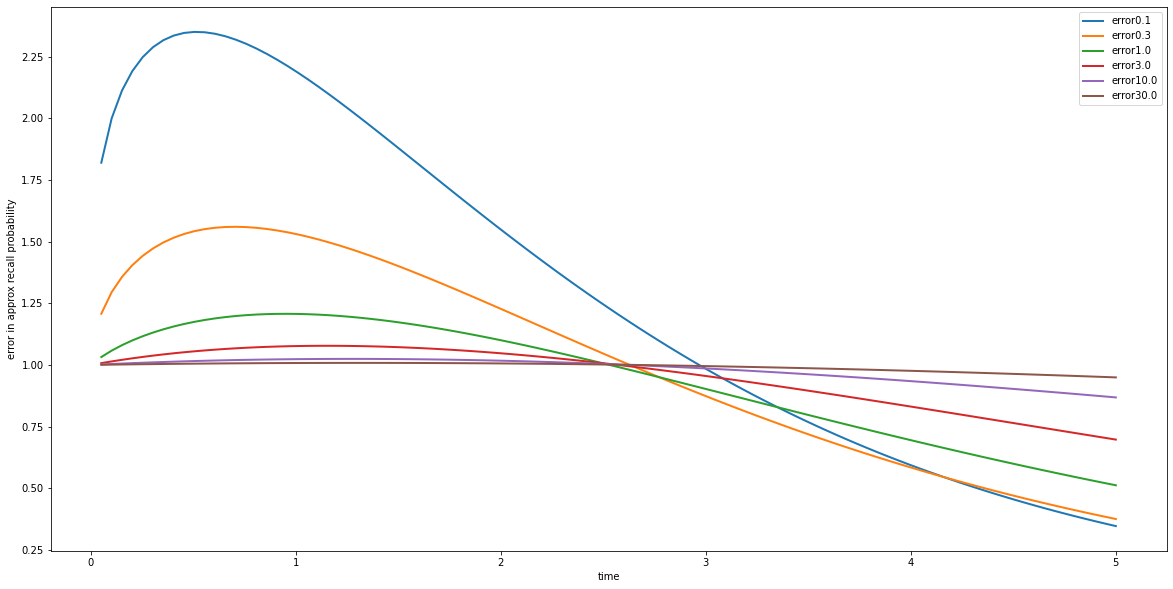

In [5]:
def approxRecall(a, b, t):
    h = a / b
    return np.exp(-t / h)
ts = np.linspace(0, 5, 100)
plt.ion()
plt.figure(figsize=(20, 10))
for i in (0.1, 0.3, 1, 3, 10, 30):
    #plt.plot(ts, np.vectorize(lambda t: predictRecall(a * i, b * i, t))(ts), label='pred%.1f' % i, linewidth=4)
    #plt.plot(ts, np.vectorize(lambda t: approxRecall(a * i, b * i, t))(ts), label='approx%.1f' % i, linewidth=2)
    plt.plot(ts, np.vectorize(lambda t: approxRecall(a * i, b * i, t) / predictRecall(a * i, b * i, t))(ts), label='error%.1f' % i, linewidth=2)
plt.legend()
plt.xlabel('time')
plt.ylabel('error in approx recall probability')
plt.savefig('error.png', dpi=96)